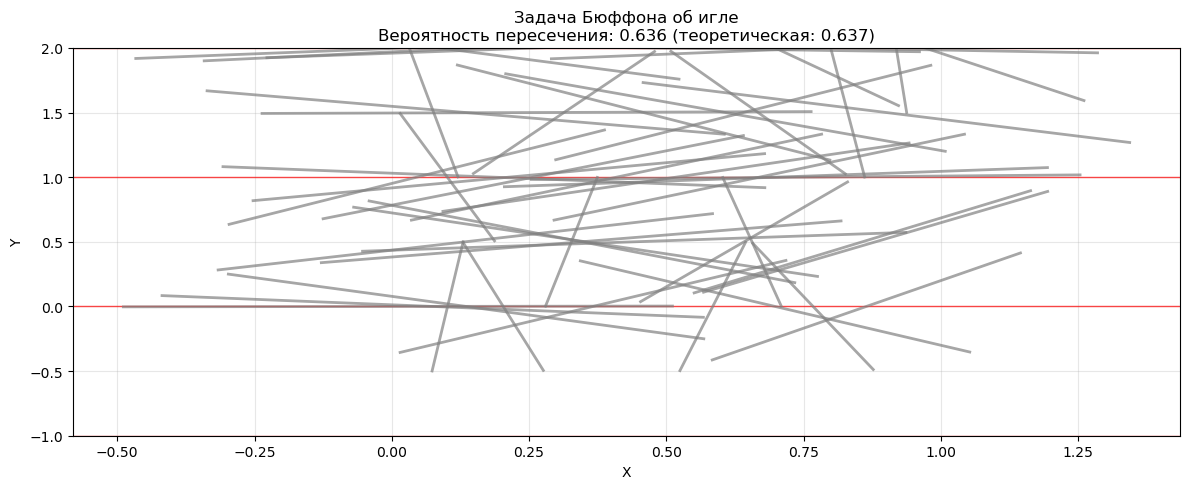

Теоретическая вероятность пересечения: 0.636620
Экспериментальная вероятность (N=15000): 0.636133
Относительная ошибка: 0.08%


In [36]:
# Задача Бюффона об игле
# Формулировка: игла длиной L бросается на плоскость, расчерченную параллельными прямыми,
# расположенными на расстоянии r друг от друга. Нужно найти вероятность того, что игла пересечёт прямую.
# Теоретическая вероятность пересечения иглы с одной из линий: P(A) = 2*L/Pi*D
# где L - длина иглы, D - расстояние между параллельными линиями

import numpy as np
import matplotlib.pyplot as plt

N = 15000

L = 1.0
D = 1.0

p_theor = (2 * L) / (np.pi * D) if L <= D else (2 / np.pi) * (np.arcsin(D / L) + (L - np.sqrt(L ** 2 - D ** 2)) / D)

x_center = np.random.uniform(0, D, N)
theta = np.random.uniform(0, np.pi, N)

vertical_proj = (L / 2) * np.abs(np.sin(theta))
crosses = (x_center <= vertical_proj) | ((D - x_center) <= vertical_proj)

p_exp = np.mean(crosses)

plt.figure(figsize=(12, 5))

y_min = -1
y_max = 2

i = -1
while i < 4:
    plt.axhline(y=i, color='red', linestyle='-', alpha=0.7, linewidth=1)
    i += D

for i in range(50):
    x = x_center[i]
    angle = theta[i]

    x1 = x - (L / 2) * np.cos(angle)
    x2 = x + (L / 2) * np.cos(angle)
    y1 = i % 5 * 0.5 - (L / 2) * np.sin(angle)
    y2 = i % 5 * 0.5 + (L / 2) * np.sin(angle)

    dist_to_line = min(x_center[i] % D, D - (x_center[i] % D))
    actually_crosses = dist_to_line <= vertical_proj[i]
    
    color = 'gray'
    plt.plot([x1, x2], [y1, y2], color=color, linewidth=2, alpha=0.7)

plt.title(f'Задача Бюффона об игле\nВероятность пересечения: {p_exp:.3f} (теоретическая: {p_theor:.3f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(y_min, y_max)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Теоретическая вероятность пересечения: {p_theor:.6f}")
print(f"Экспериментальная вероятность (N={N}): {p_exp:.6f}")
print(f"Относительная ошибка: {abs(p_exp - p_theor) / p_theor * 100:.2f}%")